***Step 1: Importing Libraries***

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set display options
pd.options.display.max_rows = 100
pd.options.display.max_columns = None


***Step 2: Loading the Dataset***

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

# Preview the data
df.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


***Step 3: Cleaning the Data***

In [ ]:
# Drop unnecessary columns
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True)

# Drop rows with all null values
df.dropna(how='all', inplace=True)

# Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Check for remaining nulls
df.isnull().sum()


,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country,0
Medal,0


***Step 4: Exploratory Data Analysis (EDA)***

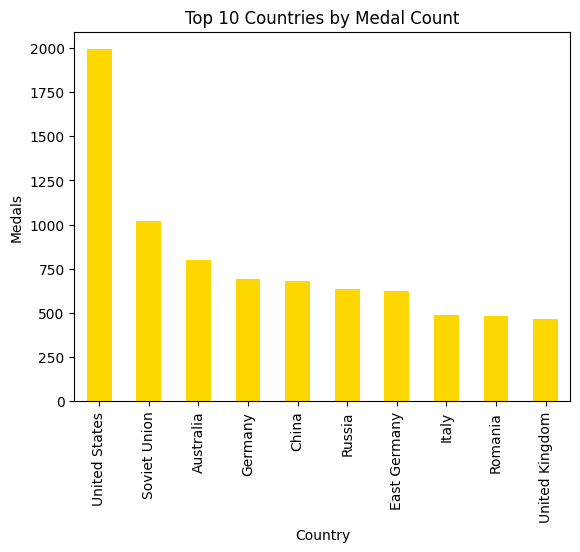

In [ ]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Medals")
plt.show()


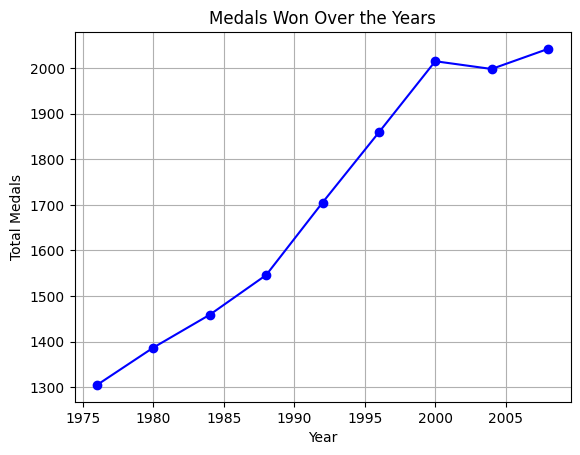

In [ ]:
medals_by_year = df.groupby('Year')['Medal'].count()
medals_by_year.plot(marker='o', linestyle='-', color='blue')
plt.title("Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()


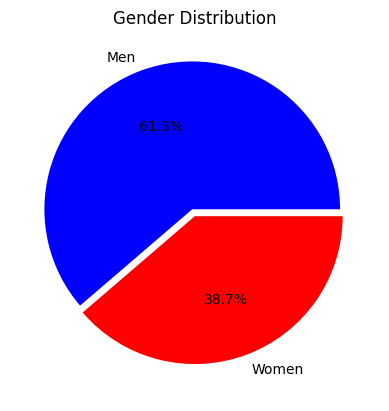

In [ ]:
gender_dist = df['Gender'].value_counts()
gender_dist.plot.pie(autopct='%1.1f%%', colors=['blue','red'], explode=[0.05, 0])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()



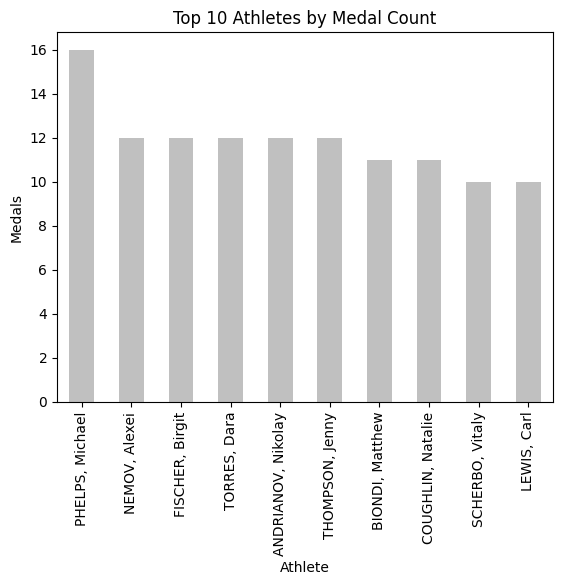

In [ ]:
top_athletes = df['Athlete'].value_counts().head(10)
top_athletes.plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Medals")
plt.show()


***Step 5: Predictive Modeling (Logistic Regression)***

In [ ]:
# Reload the dataset to ensure 'Medal' column has original string values
df = pd.read_csv('/content/sample_data/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

# Re-apply necessary data cleaning steps
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True)
df.dropna(how='all', inplace=True)
df['Year'] = df['Year'].astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical variables
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
# Encode 'Medal' column with original string values
df['Medal'] = le.fit_transform(df['Medal'])


# Define features and target
X = df[['Country', 'Sport', 'Gender']]
y = df['Medal']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.35168661588683353
Confusion Matrix:
 [[927 564  38]
 [874 651  30]
 [877 596  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.61      0.44      1529
           1       0.36      0.42      0.39      1555
           2       0.36      0.03      0.05      1511

    accuracy                           0.35      4595
   macro avg       0.35      0.35      0.29      4595
weighted avg       0.35      0.35      0.29      4595

